In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_68983_R')

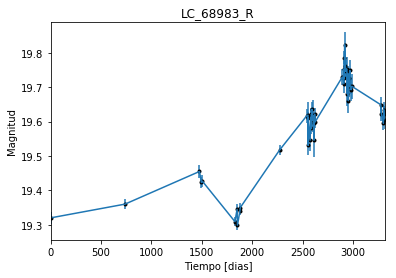

In [2]:
data = np.genfromtxt('LC_68983_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_68983_R')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

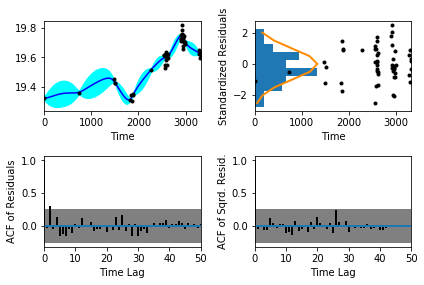

In [5]:
sample.assess_fit()

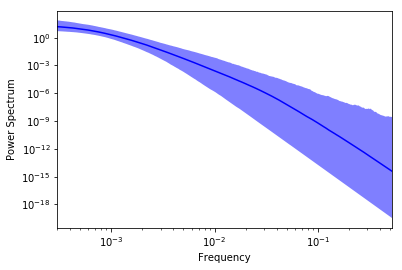

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_68983_R')

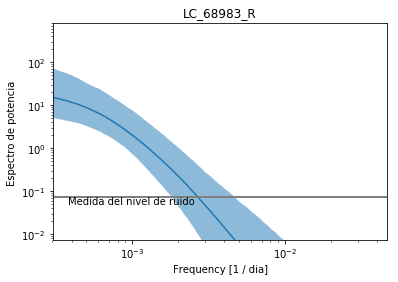

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_68983_R')

Text(0.5,1,'Prediccion , valor esperado LC_68983_R')

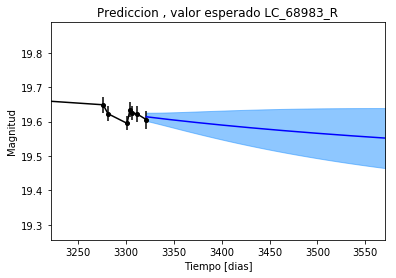

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_68983_R')

Text(0.5,1,'Prediccion, Caminos simulados LC_68983_R')

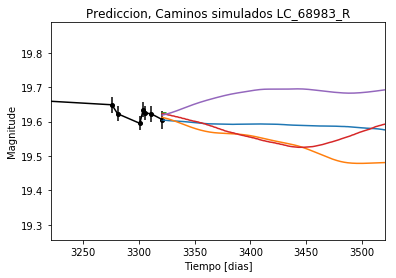

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_68983_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_68983_R')

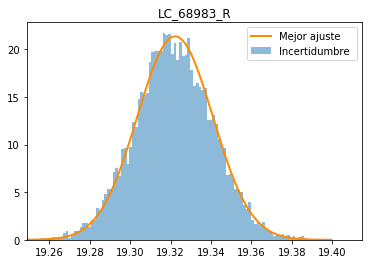

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_68983_R')

Text(0.5,1,'Interpolacion, camino simulado LC_68983_R')

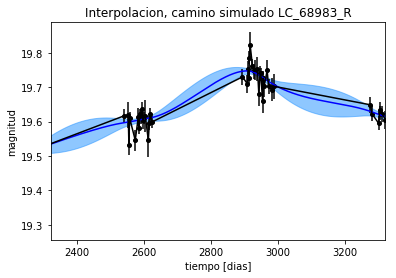

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68983_R')

Text(0.5,1,'Interpolacion, camino simulado LC_68983_R')

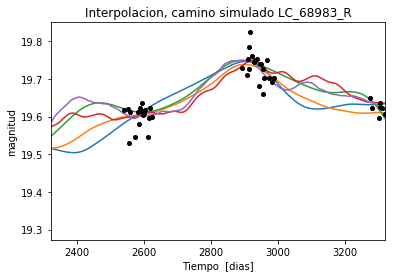

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_68983_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 758.669680548
Median: 0.00833425491601
Standard deviation: 0.191906851416
68% credibility interval: [ 0.00084256  0.15764272]
95% credibility interval: [  3.50345478e-04   7.43286635e-01]
99% credibility interval: [  3.11011242e-04   9.91917931e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 985.292547047
Median: 0.000932761916235
Standard deviation: 0.058065326872
68% credibility interval: [ 0.0003915   0.00697052]
95% credibility interval: [ 0.00031471  0.09420032]
99% credibility interval: [  3.03776169e-04   4.34581013e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 524.682447401
Median: 0.00790396020366
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1394.0038649
Median: 131.518943741
Standard deviation: 1.56217146098
68% credibility interval: [ 129.72710041  132.58861877]
95% credibility interval: [ 127.22504276  133.16371751]
99% credibility interval: [ 125.22873101  133.39166689]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 678.295985933
Median: 0.49077635511
Standard deviation: 1.81358689402
68% credibility interval: [ 0.04157151  2.93802339]
95% credibility interval: [ 0.01218453  6.33506678]
99% credibility interval: [ 0.0091129   8.26217368]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 6868.18333237
Median: 0.0784224381699
Standard deviation: 6.87330190007
68% credibility interval: [ 0.00464183  2.02666995]
95% credibility interval: [  4.11053232e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0310431
Median: 1.51740629485e-32
Standard deviation: 5.90250838908e+124
68% credibility interval: [  2.00282358e-54   3.87115991e-06]
95% credibility interval: [  5.64974013e-76   2.87355543e+01]
99% credibility interval: [  1.09025679e-106   8.06587435e+055]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1951.74910891
Median: 19.4726418622
Standard deviation: 0.091096320875
68% credibility interval: [ 19.39480014  19.54749811]
95% credibility interval: [ 19.28808789  19.65586677]
99% credibility interval: [ 19.17185936  19.76033347]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 1084.19194436
Median: 0.0
Standard deviation: 0.194775260199
68% credibility interval: [ 0.          0.10602234]
95% credibility interval: [ 0.          0.79618333]
99% credibility interval: [ 0.          0.98840658]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 1084.19194436
Median: 0.0
Standard deviation: 0.194775260199
68% credibility interval: [ 0.          0.10602234]
95% credibility interval: [ 0.          0.79618333]
99% credibility interval: [ 0.          0.98840658]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 3949.05483009
Median: 0.0
Standard deviation: 0.000167527408127
68% credibility interval: [ 0.

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1394.0038649
Median: 131.518943741
Standard deviation: 1.56217146098
68% credibility interval: [ 129.72710041  132.58861877]
95% credibility interval: [ 127.22504276  133.16371751]
99% credibility interval: [ 125.22873101  133.39166689]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1910.15218605
Median: 0.0244212082339
Standard deviation: 0.0289758071215
68% credibility interval: [ 0.01434587  0.04843059]
95% credibility interval: [ 0.00941707  0.10732754]
99% credibility interval: [ 0.00741011  0.17776505]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1864.22910965
Median: 1.09983250604
Standard deviation: 0.163898306442
68% credibility interval: [ 0.95199024  1.27305726]
95% credibility interval: [ 0.83657298  1.47130949]
99% credibility interval: [ 0.76627155  1.6359853 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1572.44199761
Median: 6.45477284108e-06
Standard deviation: 0.00569628442071
68% credibility interval: [  2.53482298e-07   2.03784968e-04]
95% credibility interval: [  7.00876075e-09   2.98044006e-03]
99% credibility interval: [  5.27634008e-60   1.32470252e-02]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 758.669680548
Median: (-0.0523656680346+0j)
Standard deviation: 1.71803062306
68% credibility interval: [-0.99049843+0.j         -0.00529393-0.00131082j]
95% credibility interval: [ -4.67020767e+00+0.j          -2.20128556e-03-0.01362821j]
99% credibility interval: [ -6.23240417e+00+0.j          -1.95414127e-03-0.00257696j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 985.292547047
Median: (-0.00586071596719+0.0148170435429j)
Standard deviation: 1.27703301754
68% credibility interval: [-0.04379705+0.00426489j -0.00245988+0.j        ]
95% credibility interval: [-0.59187807 +5.95001523e+00j -0.00197738 +2.02462794e-03j]
99% credibility interval: [ -2.73055304e+00+6.41937961j  -1.90868196e-03+0.j        ]
Posterior sum